In [1]:
import requests
import pandas as pd
import numpy as np


In [68]:
url = "http://160.75.154.58:5000/realdata2"
r = requests.get(url)
data=r.json()

In [69]:
df=pd.DataFrame.from_dict(data)
df.shape

(3988, 8)

In [70]:
df['UserId'].value_counts()

24    275
8     267
26    264
37    263
28    263
50    251
57    247
63    246
34    240
49    195
56    181
59    175
30    144
29    133
54    120
31    110
47    103
20     92
60     79
68     71
46     56
51     39
71     38
11     28
58     27
70     26
73     23
36     21
45      7
22      2
67      2
Name: UserId, dtype: int64

In [71]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
sns.set() ## matplotlib sns veriyor

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

from datetime import datetime


In [72]:
df.head()

,Id,Latitude,Longitude,MacAdress,ProcessDate,Temperature,UserId,accuracy
0,8763,41.0473,28.761793,00:1B:10:18:1D:0C,1588360724596,35.0,24,13.674
1,8787,41.0473,28.761793,00:1B:10:18:1D:0C,1588360724596,35.0,24,13.674
2,8737,41.0473,28.761793,00:1B:10:18:1D:0C,1588360724596,35.0,24,13.674
3,8686,41.0473,28.761793,00:1B:10:18:1D:0C,1588360724596,35.0,24,13.674
4,8637,41.0473,28.761793,00:1B:10:18:1D:0C,1588360724596,35.0,24,13.674


In [73]:
df.dtypes

Id               int64
Latitude       float64
Longitude      float64
MacAdress       object
ProcessDate      int64
Temperature    float64
UserId           int64
accuracy       float64
dtype: object

In [75]:
df['date']=df.apply(lambda row: datetime.fromtimestamp((row.ProcessDate)/1000),axis=1)

In [76]:
df['date'] = pd.to_datetime(df['date'] )

In [77]:
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['minute'] = df['date'].apply(lambda x: x.minute)
df['second'] = df['date'].apply(lambda x: x.second)

In [78]:
df['UserId'].value_counts().nlargest(5)


24    275
8     267
26    264
37    263
28    263
Name: UserId, dtype: int64

In [116]:
df3=df.copy()
df2=df3.loc[(df3['UserId']==31)]

In [117]:
df2.head(60)

,Id,Latitude,Longitude,MacAdress,ProcessDate,Temperature,UserId,accuracy,date,month,day,hour,minute,second
2814,12075,41.103017,29.035397,00:1B:10:18:1C:EF,1588726736045,36.360001,31,12.171,2020-05-06 03:58:56.045,5,6,3,58,56
2823,12094,41.103017,29.035397,00:1B:10:18:1C:EF,1588727336080,36.349998,31,12.171,2020-05-06 04:08:56.080,5,6,4,8,56
2853,12113,41.102987,29.035353,00:1B:10:18:1C:EF,1588727936114,35.910000,31,17.792,2020-05-06 04:18:56.114,5,6,4,18,56
2860,12132,41.102987,29.035353,00:1B:10:18:1C:EF,1588728536146,36.330002,31,17.792,2020-05-06 04:28:56.146,5,6,4,28,56
2871,12150,41.102987,29.035353,00:1B:10:18:1C:EF,1588729135988,36.310001,31,17.792,2020-05-06 04:38:55.988,5,6,4,38,55
2878,12170,41.103143,29.035327,00:1B:10:18:1C:EF,1588729736317,35.799999,31,12.003,2020-05-06 04:48:56.317,5,6,4,48,56
2885,12189,41.103143,29.035327,00:1B:10:18:1C:EF,1588730336350,36.349998,31,12.003,2020-05-06 04:58:56.350,5,6,4,58,56
2891,12208,41.103143,29.035327,00:1B:10:18:1C:EF,1588730935998,36.349998,31,12.003,2020-05-06 05:08:55.998,5,6,5,8,55
2905,12229,41.103143,29.035327,00:1B:10:18:1C:EF,1588731536027,36.360001,31,12.003,2020-05-06 05:18:56.027,5,6,5,18,56
2921,12248,41.103143,29.035327,00:1B:10:18:1C:EF,1588732136061,36.360001,31,12.003,2020-05-06 05:28:56.061,5,6,5,28,56


In [118]:
df2.shape

(110, 14)

In [119]:
df2['Temperature'] = pd.to_numeric(df2['Temperature'], errors='coerce')

df2=df2.loc[:,['date','Temperature', 'month','day','hour','minute','second']]

print(df2.shape)
print('The time series starts from: ', df2.date.min())
print('The time series ends on: ', df2.date.max())
df2.tail(5)

(110, 7)
The time series starts from:  2020-05-06 03:58:56.045000
The time series ends on:  2020-05-06 22:08:59.829000


,date,Temperature,month,day,hour,minute,second
3942,2020-05-06 21:29:00.089,35.970001,5,6,21,29,0
3952,2020-05-06 21:38:59.931,36.349998,5,6,21,38,59
3961,2020-05-06 21:48:59.962,36.369999,5,6,21,48,59
3972,2020-05-06 21:58:59.991,35.990002,5,6,21,58,59
3980,2020-05-06 22:08:59.829,36.310001,5,6,22,8,59


In [120]:
df2.head()

,date,Temperature,month,day,hour,minute,second
2814,2020-05-06 03:58:56.045,36.360001,5,6,3,58,56
2823,2020-05-06 04:08:56.080,36.349998,5,6,4,8,56
2853,2020-05-06 04:18:56.114,35.910000,5,6,4,18,56
2860,2020-05-06 04:28:56.146,36.330002,5,6,4,28,56
2871,2020-05-06 04:38:55.988,36.310001,5,6,4,38,55


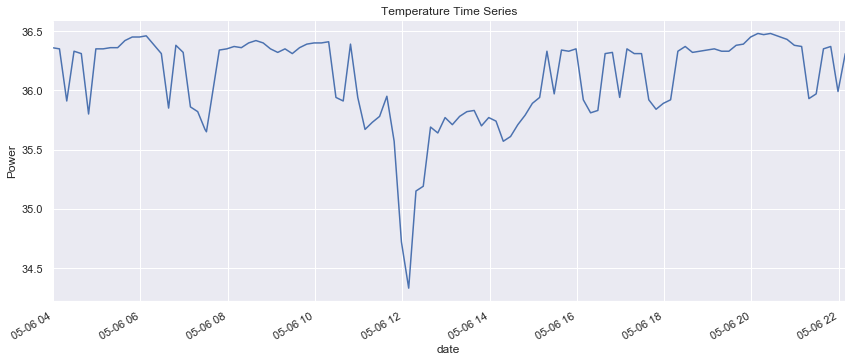

In [121]:
df2=df2.loc[:,['date','Temperature']]
df2.set_index('date',inplace=True)
df2.plot(figsize=(12,5))
plt.ylabel('Power')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Temperature Time Series')
sns.despine(top=True)
plt.show();

In [122]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [123]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])


In [124]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    fig=plt.figure(figsize=(20,8))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        print(series[window:])
        mae = mean_absolute_error(series[window:], rolling_mean[window:]) 
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        print(mae,deviation)
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    

                         Temperature
date                                
2020-05-06 04:28:56.146    36.330002
2020-05-06 04:38:55.988    36.310001
2020-05-06 04:48:56.317    35.799999
2020-05-06 04:58:56.350    36.349998
2020-05-06 05:08:55.998    36.349998
2020-05-06 05:18:56.027    36.360001
2020-05-06 05:28:56.061    36.360001
2020-05-06 05:38:55.901    36.419998
2020-05-06 05:48:55.932    36.450001
2020-05-06 05:58:55.962    36.450001
2020-05-06 06:08:10.949    36.459999
2020-05-06 06:08:10.949    36.459999
2020-05-06 06:28:56.030    36.310001
2020-05-06 06:38:55.869    35.849998
2020-05-06 06:48:55.902    36.380001
2020-05-06 06:58:55.934    36.320000
2020-05-06 07:08:55.966    35.860001
2020-05-06 07:18:55.807    35.820000
2020-05-06 07:28:55.840    35.669998
2020-05-06 07:30:55.769    35.650002
2020-05-06 07:48:35.889    36.340000
2020-05-06 07:58:55.929    36.349998
2020-05-06 08:08:55.959    36.369999
2020-05-06 08:18:55.797    36.360001
2020-05-06 08:28:55.828    36.400002
2

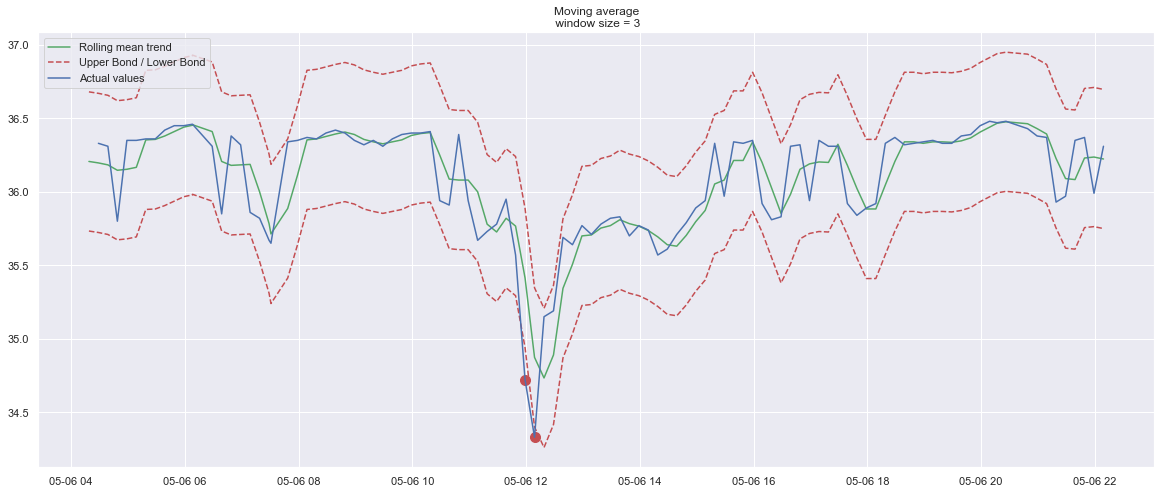

In [127]:
plotMovingAverage(df2, 3, plot_intervals=True, plot_anomalies=True) 